## <b><div style='padding:15px;background-color:#583E26;color:white;border-radius:2px;font-size:110%;text-align: left'>Introduction</div></b>

**About:**
This notebook contains preparation, data processing (of missing values), data exploration, and data visualization of the 'IBM HR Analytics Employee Attrition & Performance' dataset.

**Background:**
In the previously published notebook, I documented the process of how I decided to use the 'IBM HR Analytics Employee Attrition & Performance' dataset for my data science project. This notebook is titled as 'ML01 Data Selection' notebook and its link is found in the Appendix section of this notebook.

Next, I am going to explore and understand the data in this notebook.

**Goals:**

- To load the data successfully 
- To conduct the exploratory data analysis (EDA) using the **Panda** library
- To create data visualizations using the **Seaborn** library
- To develop the next-step action plan

**Objectives:**

1. Preparation
>- Set the environment
>- Load the data successfully
>- Conduct preliminary data analysis

2. Data Processing (of Missing Values)
>- Identify missing values
>- (Address missing values) 

3. Data Exploration
>- Explore data
>- Identify **Ordinal** and **Nominal** variables
>- Generate **Summary Statistics**

4. Data Visualization
>- Visualize distributions of data

## <b><div style='padding:15px;background-color:#A78B71;color:white;border-radius:2px;font-size:110%;text-align: left'>1 | Preparation</div></b>

### 1.1 Set environment

In [1]:
# import libraries

# data processing
import numpy as np # linear algebra
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly for data visualization

print("libraries are loaded")

libraries are loaded


In [ ]:
# pip install -U seaborn

In [2]:
# prepare environment

# for seaborn
sns.set_style('whitegrid')

import warnings # mute warnings

print("environment is ready")

environment is ready


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    
    for filename in filenames:
        print(os.path.join(dirname, filename))

### 1.2 Load data

In [3]:
# Read the data

# IBM HR Analytics Employee Attrition & Performance Dataset
df_train = pd.read_csv('data.csv') 

print("data is loaded")

data is loaded


### 1.3 Conduct preliminary analysis of data

In [4]:
print('training dataset has {} rows and {} columns'.format(df_train.shape[0],df_train.shape[1]))

training dataset has 1470 rows and 35 columns


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**comment:** on the "IBM HR Analytics Employee Attrition & Performance" Dataset

- The dataset has 1470 rows and 35 columns
- 35 columns comprise of 26 numerical variables and 9 categorical variables

## <b><div style='padding:15px;background-color:#F7C815;color:white;border-radius:2px;font-size:110%;text-align: left'>2 | Missing Values</div></b>

### 2.1 Identify missing values

In [6]:
print(f"total number of missing values by attribute:\n{df_train.isnull().sum()}")

total number of missing values by attribute:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany           

In [7]:
print(f"total number of missing values in the entire DataFrame: {df_train.isnull().sum().sum()}")

total number of missing values in the entire DataFrame: 0


In [8]:
# print names of columns with missing values

# method 1:
cols_with_missing = [col for col in df_train.columns
                     if df_train[col].isnull().any()]

print(f"the names of columns with missing values:\n{cols_with_missing}")

the names of columns with missing values:
[]


In [9]:
# print names of columns with missing values

# method 2:
missingVal_byCol = (df_train.isnull().sum())
print(f"the names of columns with missing values:\n{missingVal_byCol[missingVal_byCol > 0]}")

the names of columns with missing values:
Series([], dtype: int64)


**comment:** the data looks good. no further data processing is needed.

## <b><div style='padding:15px;background-color:#EC9704;color:white;border-radius:2px;font-size:110%;text-align: left'>3 | Data Exploration</div></b>

### 3.1 Explore data

In [10]:
df_train.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

<div class="alert alert-block alert-info">
    <b>💡</b><b>Key Observations:</b>
  </div>

>
> The following columns are "no use" variables; they does not add values to the predictive model that I am going to build:
> - EmployeeNumber (1470 unique values)
> - EmployeeCount (only 1 unique value)
> - Over18 (only 1 unique value)
> - StandardHours (only 1 unique value)

> **action:** drop these 4 columns

In [13]:
df_train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
# include all columns
df_train.describe(include='all')

# include only the number columns
df_train.describe(include='number')
df_train.describe(include='int64')

# include only the categorical columns
df_train.describe(exclude='number')
df_train.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [17]:
# identify categorical columns in the training data

# method 1:
categorical_cols = [col for col in df_train.columns if df_train[col].dtype == "object"]
print("names of categorical columns: ", categorical_cols)

names of categorical columns:  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [18]:
# print cardinarity of identified categorical columns in a different way

# method 2:
df_train[categorical_cols].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

### 3.2 Identify **ordinal** and **nominal** variables

In [19]:
#1. 'Attrition'
print("unique values for 'Attrition':", df_train['Attrition'].unique())

unique values for 'Attrition': ['Yes' 'No']


In [20]:
#2. 'BusinessTravel'
print("unique values for 'BusinessTravel':", df_train['BusinessTravel'].unique())

unique values for 'BusinessTravel': ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


In [21]:
#3. 'Department'
print("unique values for 'Department':", df_train['Department'].unique())

unique values for 'Department': ['Sales' 'Research & Development' 'Human Resources']


In [22]:
#4. 'EducationField'
print("unique values for 'EducationField':", df_train['EducationField'].unique())

unique values for 'EducationField': ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


In [23]:
#5. 'Gender'
print("unique values for 'Gender':", df_train['Gender'].unique())

unique values for 'Gender': ['Female' 'Male']


In [24]:
#6. 'JobRole'
print("unique values for 'JobRole':", df_train['JobRole'].unique())

unique values for 'JobRole': ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


In [25]:
#7. 'MaritalStatus'
print("unique values for 'MaritalStatus':", df_train['MaritalStatus'].unique())

unique values for 'MaritalStatus': ['Single' 'Married' 'Divorced']


In [26]:
#8. 'OverTime'
print("unique values for 'OverTime':", df_train['OverTime'].unique())

unique values for 'OverTime': ['Yes' 'No']


<div class="alert alert-block alert-info">
    <b>💡</b><b>Key Observations:</b>
  </div>

> Identified the needs for **Categorical Encoding**:
> - Attrition (2 values) needs **binary encoding** to encode categorical values ('Yes'/'No') to numerical values
> - BusinessTravel (3 values) is an **ordinal variable** and needs **ordinal encoding**
> - Department (3 values) is a **nominal varialbe** and needs **one-hot encoding**
> - EducationField (6 values): is a **nominal variable** and needs other **categorical encoding**
> - Gender (2 values): needs **binary encoding**
> - JobRole (9 values): is a **nominal variable** and needs other **categorical encoding**
> - MaritalStatus (3 values) is a **nominal variable** and needs **one-hot encoding**
> - OverTime (2 values): needs **binary encoding**

<div class="alert alert-block alert-info">
    <b>💡</b><b>Key Points:</b>
</div>

> - **Ordinal** variables: categorical variables with a clear ordering in the values
> - **Nominal** variables: categorical variables without an ordering in the values
> 
> Reference: https://www.kaggle.com/code/alexisbcook/categorical-variables

### 3.3 Generate **Summary Statistics**

In [27]:
# generate summary statistics
df_train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## <b><div style='padding:15px;background-color:#9C4A1A;color:white;border-radius:2px;font-size:110%;text-align: left'>4 | Data Visualization</div></b>

In [28]:
# Mute warnings
warnings.filterwarnings('ignore')

print("warnings are muted")

warnings are muted


### 4.1 Histograms

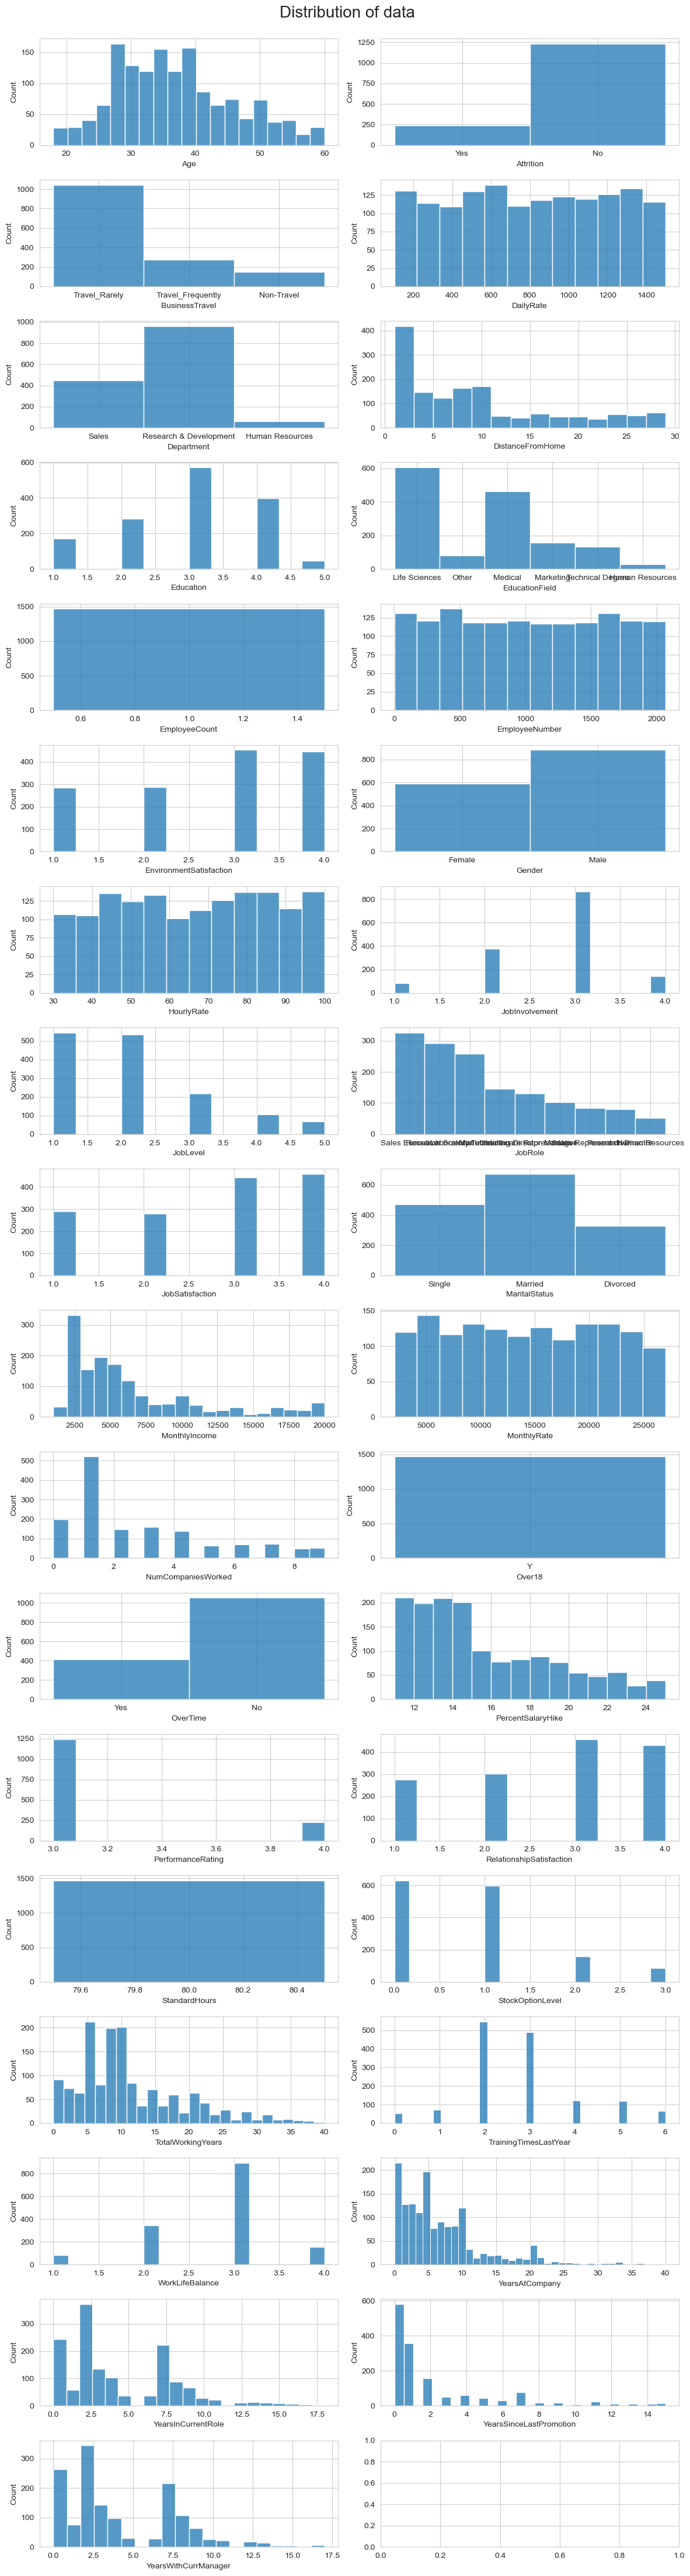

In [29]:
# histograms | copied a block of codes produced by @phongnguyen1

ncols = 2
nrows = np.ceil(len(df_train.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(df_train.columns, axs.flatten()):
    sns.histplot(df_train, x=c, ax=ax)
fig.suptitle('Distribution of data', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

# source: https://www.kaggle.com/code/phongnguyen1/s3e3-from-eda-to-final-submission/notebook

**observation:**

Above data visualizations confirm what I previously stated about the following "no use" columns:
- EmployeeNumber (1470 unique values)
- EmployeeCount (only 1 unique value)
- Over18 (only 1 unique value)
- StandardHours (only 1 unique value)

In [30]:
df_train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## <b><div style='padding:15px;background-color:#583E26;color:white;border-radius:2px;font-size:110%;text-align: left'>Conclusion</div></b>

The following actions will be addressed in the next notebook, "**ML_03 Data Preparation**"

**#1**<br>
**Key Observation:** Identified "no use" variables; these are variables that add no value to machine learning models.<br>
**Action:** Drop "no use" variables<br>
- EmployeeNumber (1470 unique numerical values)
- EmployeeCount (only 1 unique numerical value)
- Over18 (only 1 unique categorical value)
- StandardHours (only 1 unique numerical value)

**#2**<br>
**Key Observation:** Identified categorical variables that need one of following encodings: binary encoding, ordinal encoding, one-hot encoding or other categorical encoding.<br>
**Action:** Encode categorical variables to numerical values<br>

1. Binary encoding
> - Attrition (2 values) needs **binary encoding** to encode categorical values ('Yes'/'No') to numerical values
> - Gender (2 values): needs **binary encoding**
> - OverTime (2 values): needs **binary encoding**

2. Ordinal encoding
> - BusinessTravel (3 values) is an **ordinal variable** and needs **ordinal encoding**

3. One-hot encoding
> - Department (3 values) is a **nominal varialbe** and needs **one-hot encoding**
> - MaritalStatus (3 values) is a **nominal variable** and needs other **one-hot encoding**

4. Other categorical encoding
> - EducationField (6 values): is a **nominal variable** and needs other **categorical encoding**
> - JobRole (9 values): is a **nominal variable** and needs other **categorical encoding**

In [31]:
df_train.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


## <b><div style='padding:15px;background-color:#583E26;color:white;border-radius:2px;font-size:110%;text-align: left'>Next Step</div></b>

- **Data Preparation** by addressing two actions identified above. This step is critical for building robust machine learning models.  

## <b><div style='padding:15px;background-color:#A78B71;color:white;border-radius:2px;font-size:110%;text-align: left'>Appendix</div></b>

**Employee Attrition Series:**
<br>
> ML01 Data Selection - https://www.kaggle.com/code/juliasuzuki/ml-01-data-selection?scriptVersionId=121284925